In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy import stats
import os
import pylab
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import mpld3
import plotly.io as pio

In [2]:
samples = np.loadtxt("samples.txt")
samples.shape

(106038, 1001)

<IPython.core.display.Javascript object>


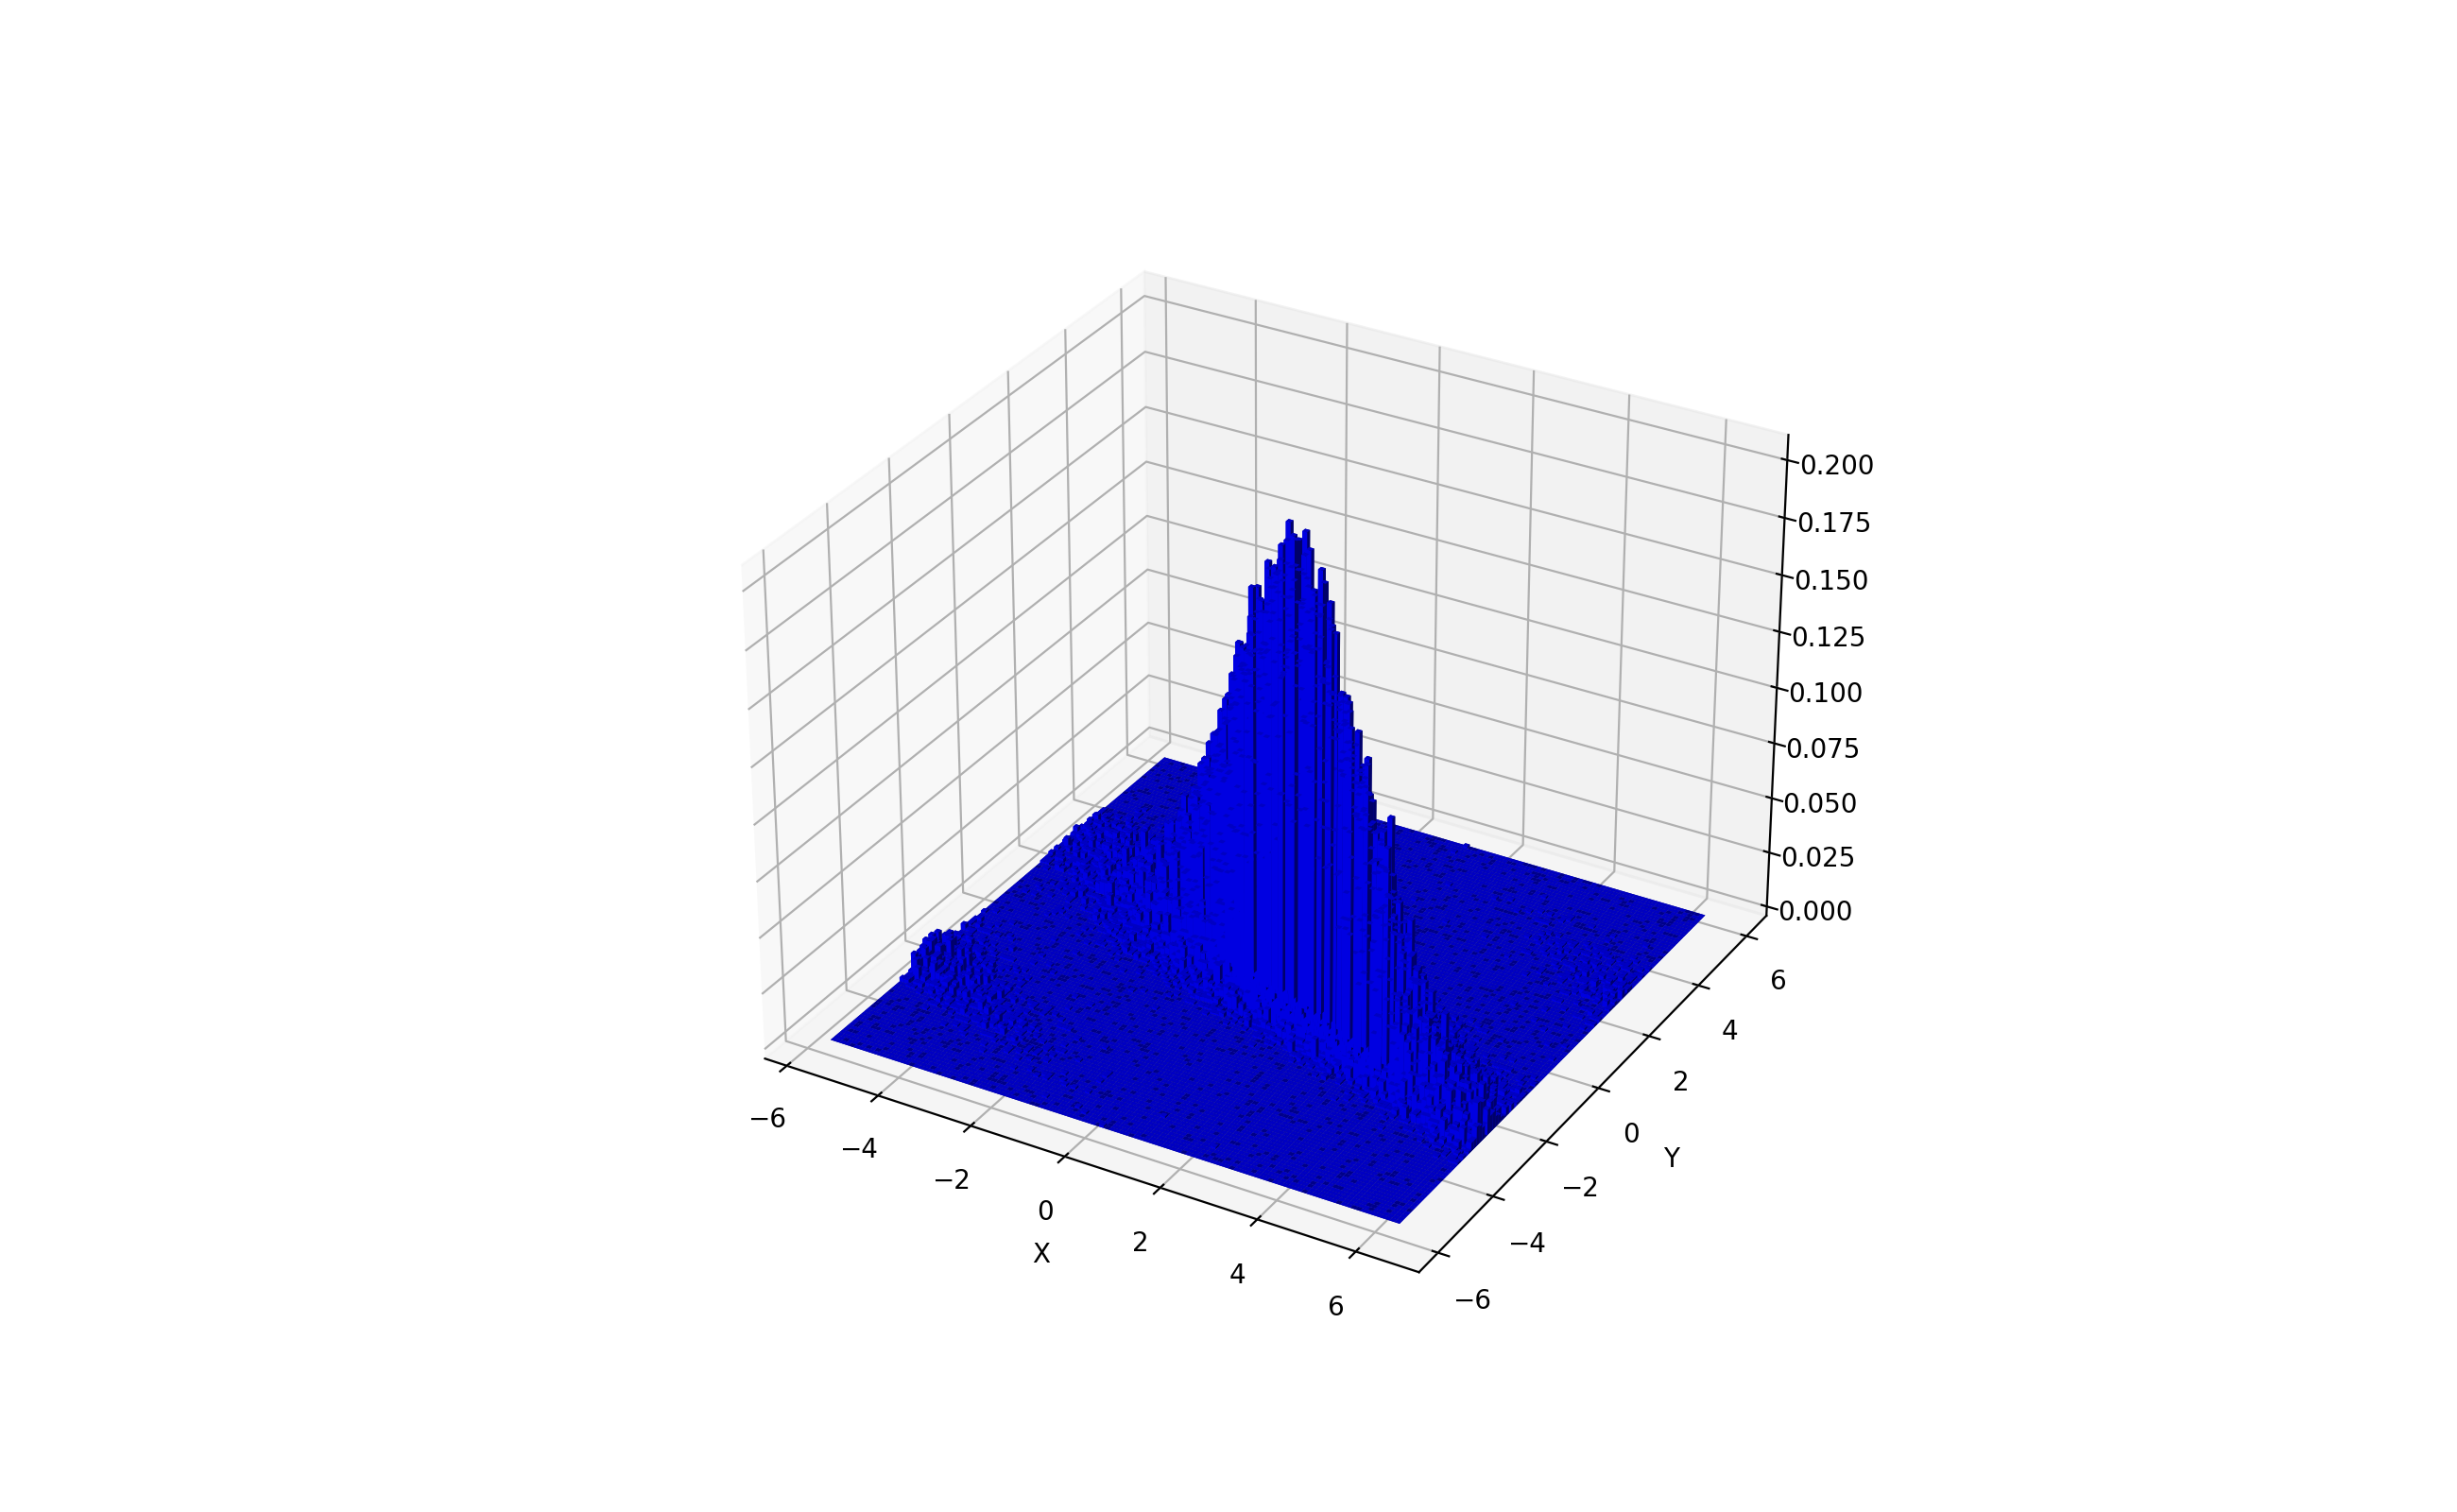

In [3]:
mid = int(samples.shape[1]/2)
for k in range(1,2):
    
    plt.rc('figure', figsize=(13, 8))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    data1 = samples[:,mid-k] - samples[:,mid-k+1]
    data2 = samples[:,mid+k] - samples[:,mid+k-1]
    
    data1 = (data1-np.mean(data1)) / np.std(data1)
    data2 = (data2-np.mean(data2)) / np.std(data2)
    
    increments=0.10
    tmp1 = np.arange(min(data1), max(data1) + increments, increments)
    tmp2 = np.arange(min(data2), max(data2) + increments, increments)
    
    hist, xedges, yedges = np.histogram2d(data1, data2, bins=(tmp1,tmp2), density=True)
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)

    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')
    plt.xlabel ("X")
    plt.ylabel ("Y")

    plt.show()

<IPython.core.display.Javascript object>


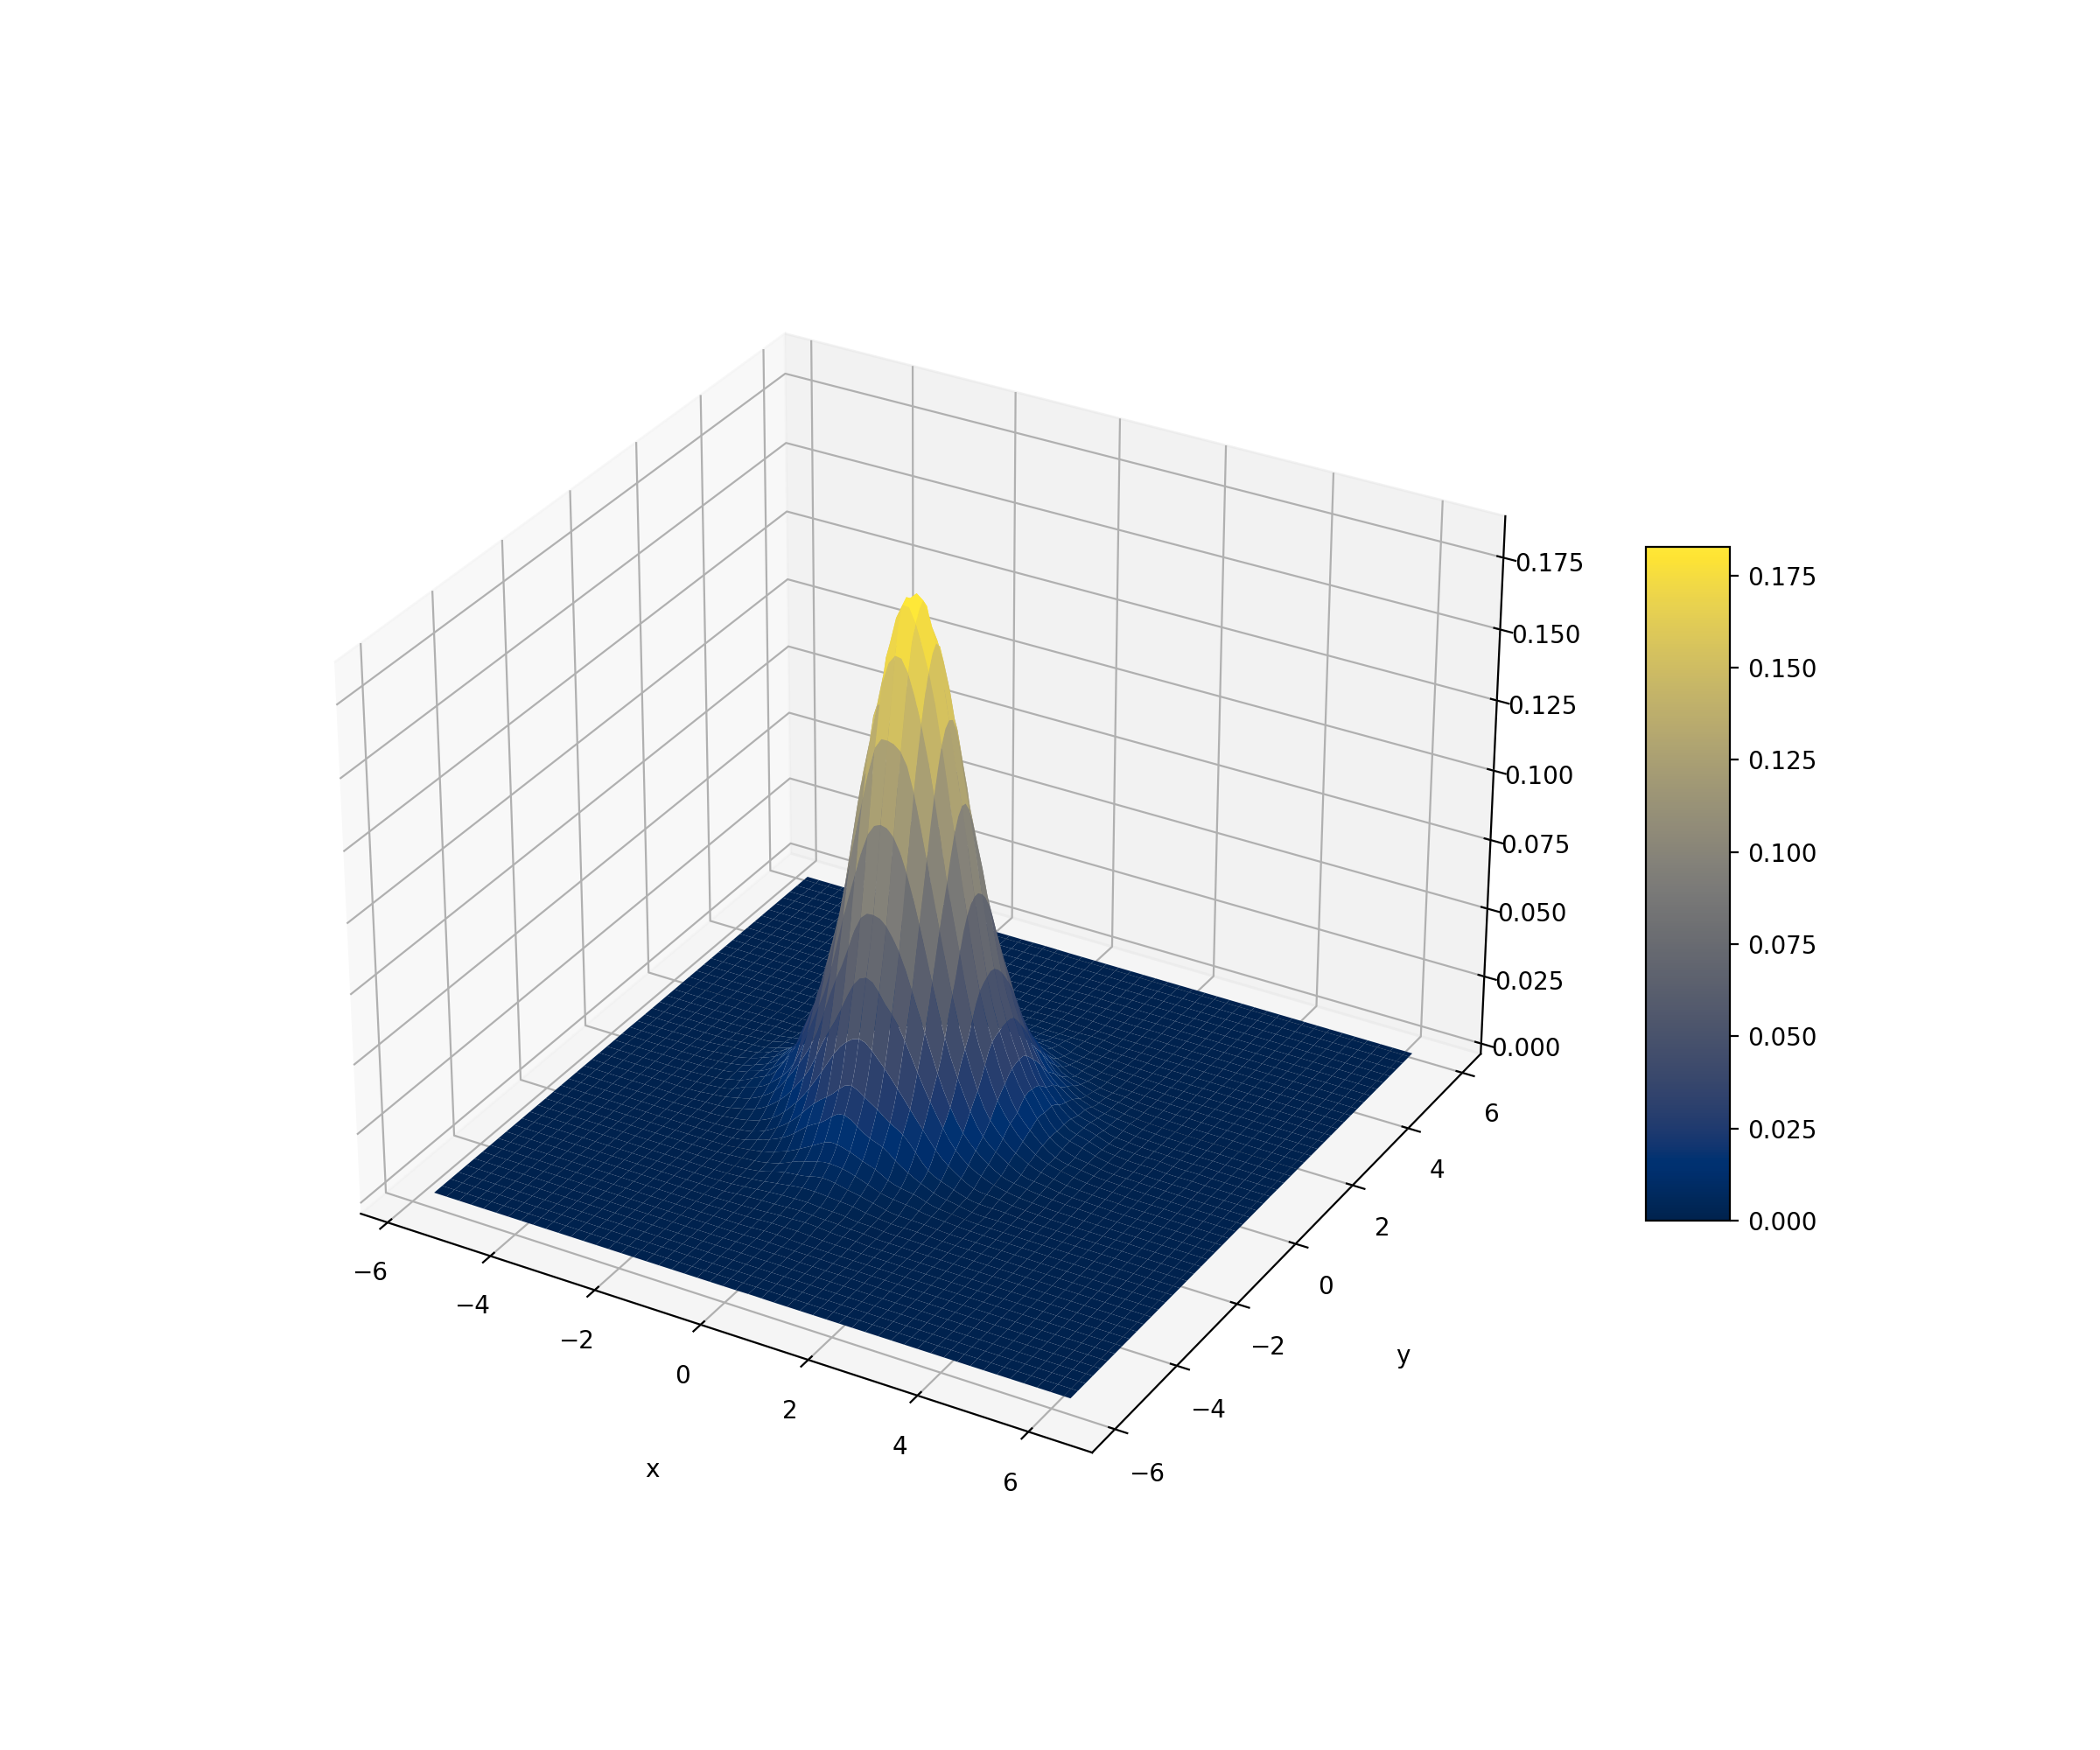

In [4]:
mid = int(samples.shape[1]/2)
for k in range(1,2):
    
    data1 = samples[:,mid-k] - samples[:,mid-k+1]
    data2 = samples[:,mid+k] - samples[:,mid+k-1]
    
    data1 = (data1-np.mean(data1)) / np.std(data1)
    data2 = (data2-np.mean(data2)) / np.std(data2)
    
    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')
    
    m1, m2 = data1, data2
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)

    fig.colorbar(surf, shrink=0.5, aspect=8)

    plt.show()

<IPython.core.display.Javascript object>


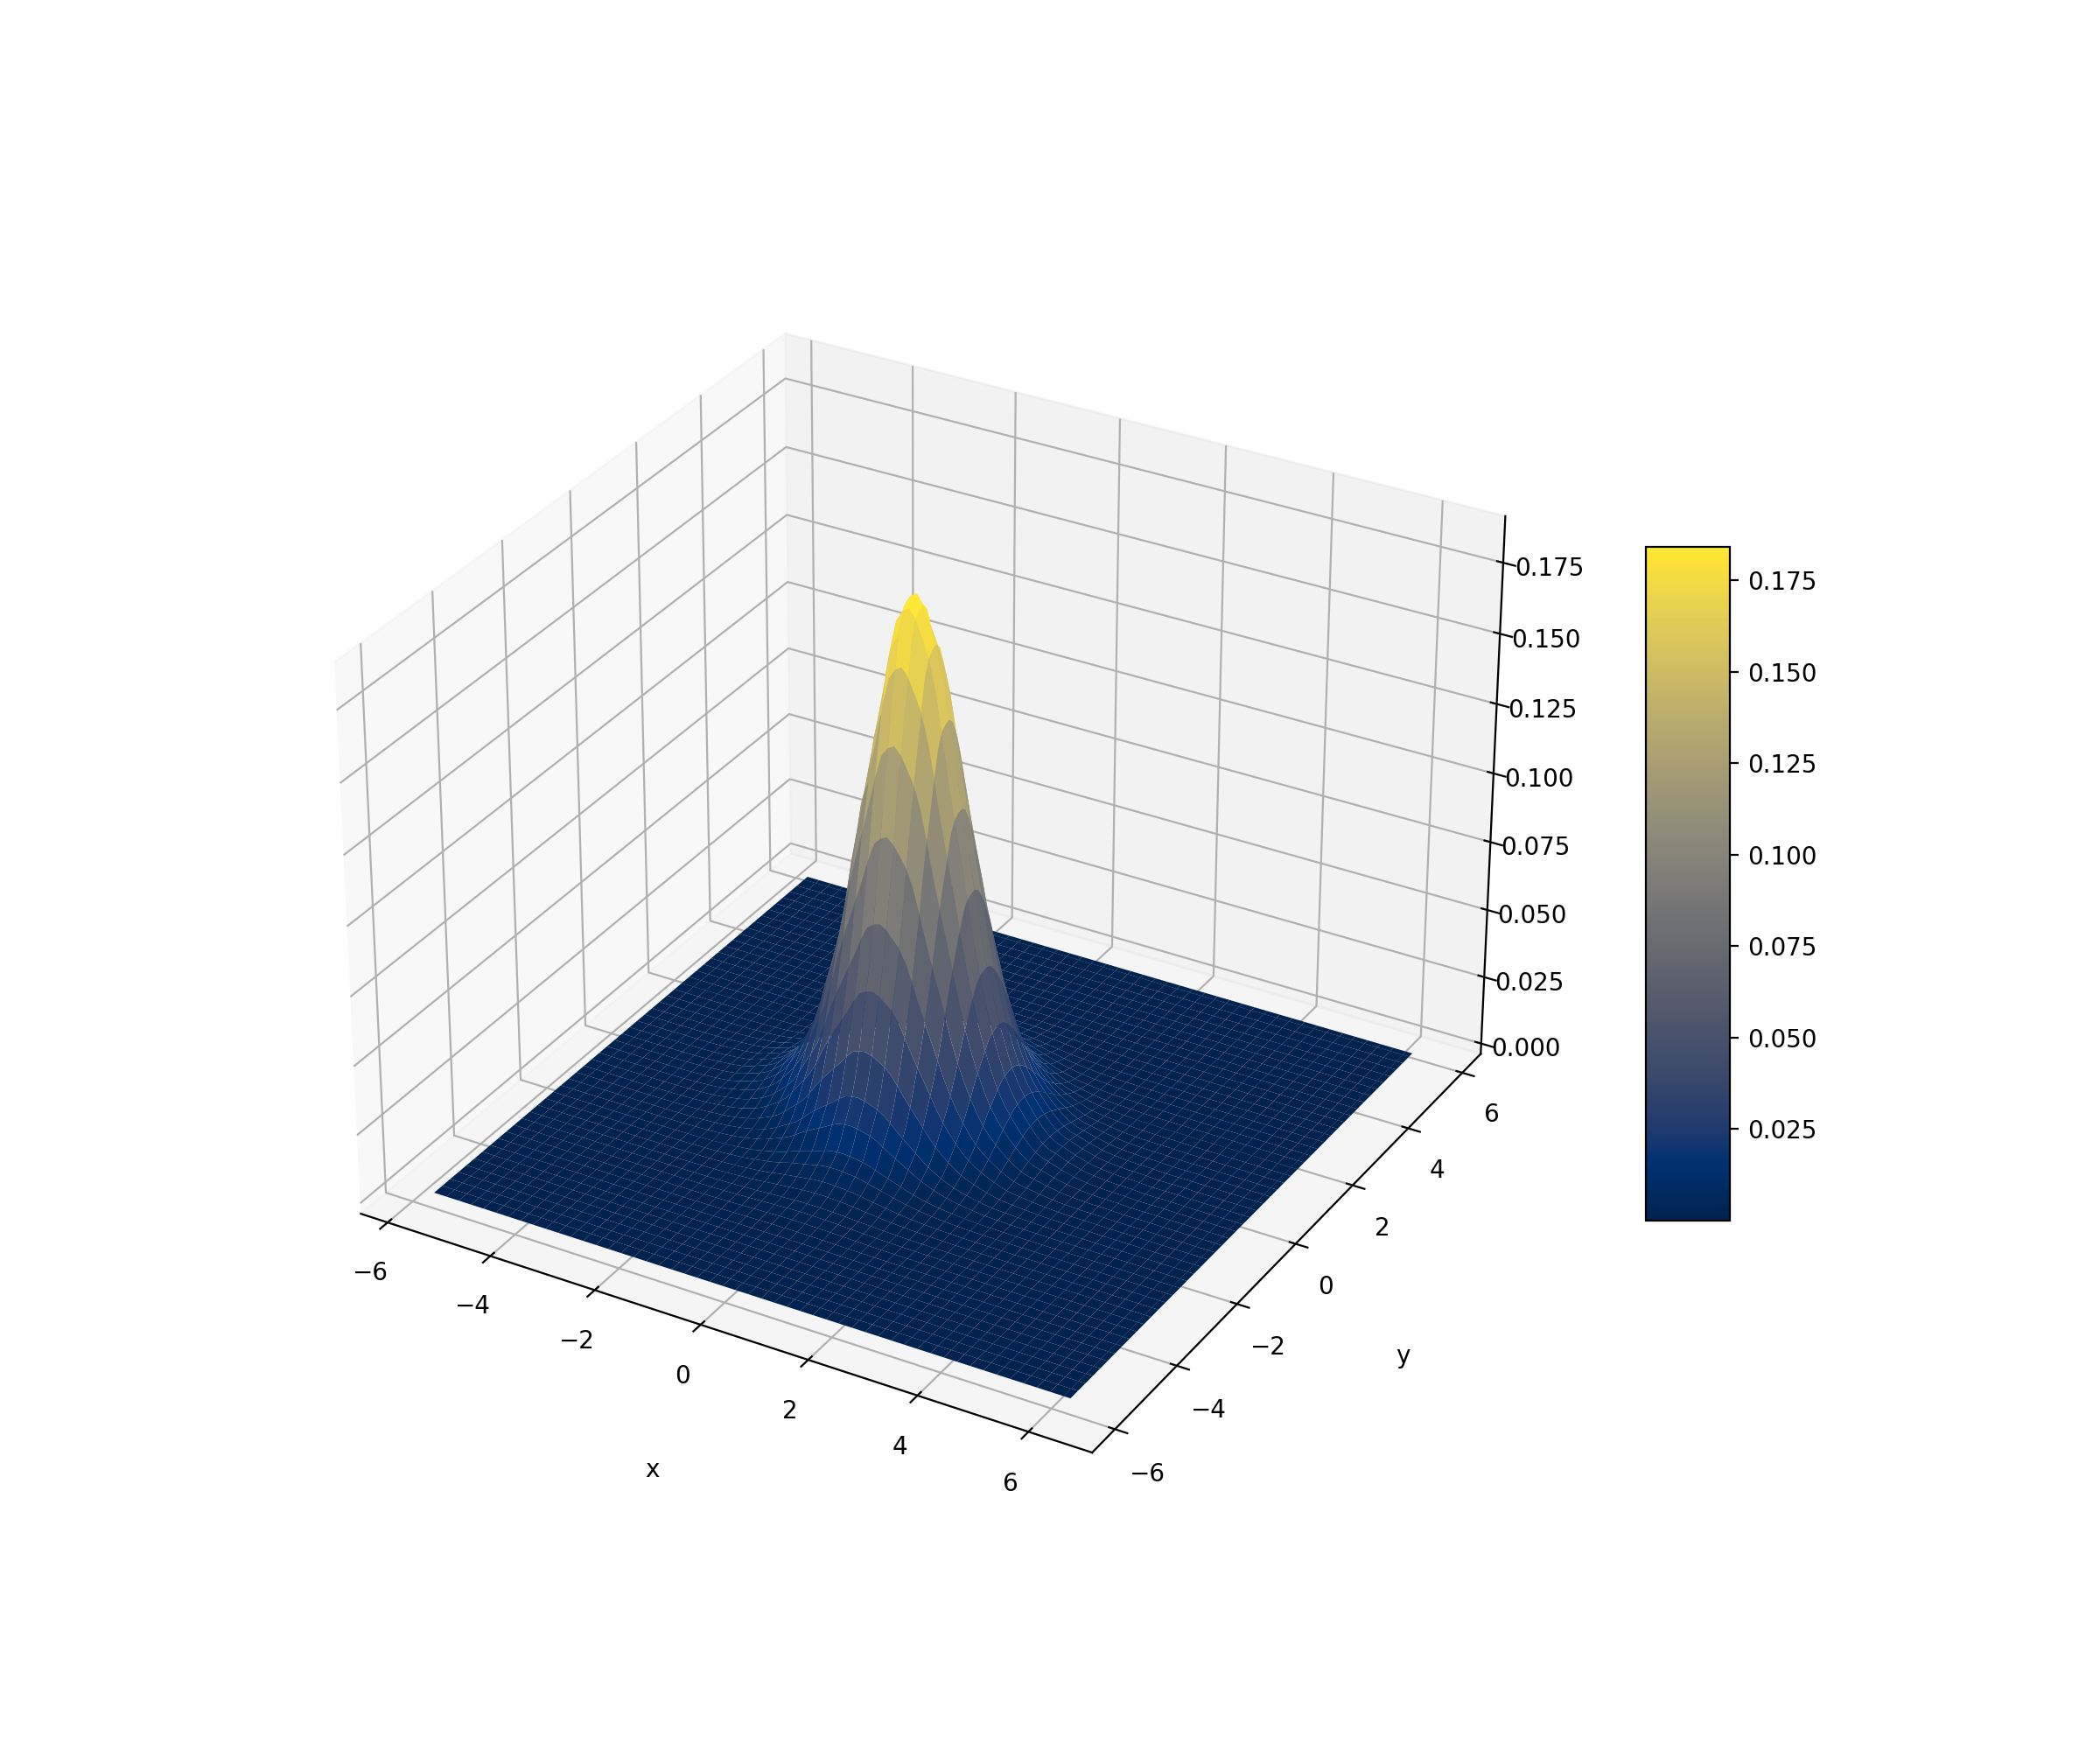

In [5]:
mid = int(samples.shape[1]/2)
for k in range(1,2):
    
    data1 = samples[:,mid-k] - samples[:,mid-k+1]
    data2 = samples[:,mid+k] - samples[:,mid+k-1]
    
    data1 = (data1-np.mean(data1)) / np.std(data1)
    data2 = (data2-np.mean(data2)) / np.std(data2)
    
    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')
    
    m1, m2 = data1, data2
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions1 = np.vstack([X.ravel()])
    positions2 = np.vstack([Y.ravel()])
    kernel_1 = stats.gaussian_kde(m1)
    kernel_2 = stats.gaussian_kde(m2)
    Z = np.reshape(np.multiply(kernel_1(positions1).T,kernel_2(positions2).T), X.shape)

    surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)

    fig.colorbar(surf, shrink=0.5, aspect=8)

    plt.show()